<a href="https://colab.research.google.com/github/aimbsg/EIP4-GB/blob/Session-3-Assignment/Session_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [7]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


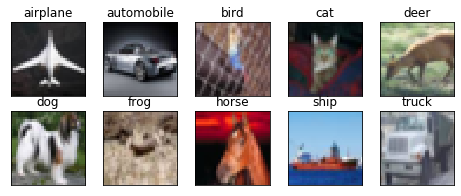

In [8]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_21 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 8s 20ms/step - loss: 1.8634 - acc: 0.2892 - val_loss: 1.4292 - val_acc: 0.4617
Epoch 2/50
390/390 [==============================] - 7s 18ms/step - loss: 1.3463 - acc: 0.5142 - val_loss: 1.1459 - val_acc: 0.5822
Epoch 3/50
390/390 [==============================] - 7s 18ms/step - loss: 1.1430 - acc: 0.5961 - val_loss: 0.9748 - val_acc: 0.6611
Epoch 4/50
390/390 [==============================] - 7s 18ms/step - loss: 1.0147 - acc: 0.6436 - val_loss: 0.9119 - val_acc: 0.6807
Epoch 5/50
390/390 [==============================] - 7s 18ms/step - loss: 0.9101 - acc: 0.6853 - val_loss: 0.8086 - val_acc: 0.7190
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8308 - acc: 0.7140 - val_loss: 0.7248 - val_acc: 0.7503
Epoch 7/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7734 - acc: 0.7339 - val_loss: 0.7331 - val_acc: 0.7469
Epoch 8/50
390/390 [==============================] - 7s 18ms/step - 

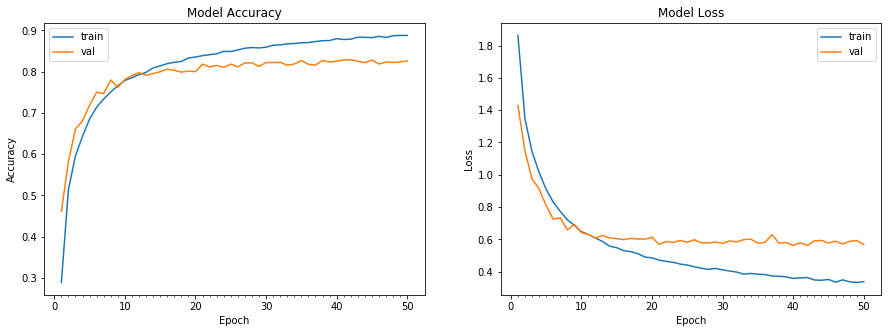

Accuracy on test data is: 82.62


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
from keras.layers.convolutional import SeparableConvolution2D as sepConv2D

In [119]:
model1 = Sequential()

model1.add(sepConv2D(32, 3, 3, input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))
# O/P - 30X30 R.F - 3X3

model1.add(sepConv2D(64, 3, 3))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))
# O/P - 28X28 R.F - 5X5

model1.add(sepConv2D(128, 3, 3))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))
# O/P - 26X26 R.F - 7X7

model1.add(sepConv2D(256, 3, 3))
# O/P - 24X24 R.F - 9X9
model1.add(MaxPooling2D(pool_size=(2, 2)))
# O/P - 12X12 R.F - 18X18

model1.add(sepConv2D(32, 3, 3))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))
# O/P - 10X10 R.F - 20X20

model1.add(sepConv2D(64, 3, 3))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))
# O/P - 8X8 R.F - 22X22

model1.add(sepConv2D(128, 3, 3))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))
# O/P - 6X6 R.F - 24X24

model1.add(sepConv2D(10, 1, 1))

model1.add(Flatten())
model1.add(Dense(75))
model1.add(Activation('relu'))
model1.add(Dropout(0.05))

model1.add(Dense(num_classes, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(256, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launch

In [120]:
model1.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_327 (Separa (None, 30, 30, 32)        155       
_________________________________________________________________
activation_272 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_265 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_272 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_328 (Separa (None, 28, 28, 64)        2400      
_________________________________________________________________
activation_273 (Activation)  (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_266 (Bat (None, 28, 28, 64)      

In [121]:
from keras.preprocessing.image import ImageDataGenerator

datagen1 = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start1 = time.time()
# Train the model
model_info1 = model1.fit_generator(datagen1.flow(train_features, train_labels, batch_size = 32),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end1 = time.time()
print ("Model took %0.2f seconds to train"%(end1 - start1))
# plot model history
plot_model_history(model_info1)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=1562, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
1562/1562 [==============================] - 96s 62ms/step - loss: 1.4238 - acc: 0.4850 - val_loss: 1.3564 - val_acc: 0.5321
Epoch 2/50
1562/1562 [==============================] - 79s 51ms/step - loss: 1.1022 - acc: 0.6056 - val_loss: 1.0728 - val_acc: 0.6167
Epoch 3/50
1562/1562 [==============================] - 79s 50ms/step - loss: 0.9676 - acc: 0.6560 - val_loss: 1.0087 - val_acc: 0.6569
Epoch 4/50
1562/1562 [==============================] - 79s 50ms/step - loss: 0.8785 - acc: 0.6909 - val_loss: 0.8618 - val_acc: 0.7004
Epoch 5/50
1562/1562 [==============================] - 79s 51ms/step - loss: 0.8283 - acc: 0.7067 - val_loss: 0.9224 - val_acc: 0.6808
Epoch 6/50
1562/1562 [==============================] - 79s 51ms/step - loss: 0.7852 - acc: 0.7211 - val_loss: 0.8628 - val_acc: 0.7045
Epoch 7/50
1562/1562 [==============================] - 78s 50ms/step - loss: 0.7491 - acc: 0.7365 - val_loss: 0.8400 - val_acc: 0.7173
Epoch 8/50
1562/1562 [==========================

KeyboardInterrupt: ignored